In [3]:
""" 
Reading saved data,
once DataFrame is read we modify it -
we change column names, modify time format, and add bus_stop_id 
"""

from Data_reading.reading import give_modified_bus_stops_df
from Data_reading.reading import give_modified_lines_stops_df
from Data_reading.reading import give_modified_curr_positions_df
from Data_reading.reading import give_modified_time_tables_df

def give_data(funct_to_get):
    early_data = funct_to_get(late_hours = False) # to be changed
    late_data = funct_to_get(late_hours = True)
    return [early_data, late_data]

bus_stops_dfs = give_data(give_modified_bus_stops_df)
lines_stops_dfs = give_data(give_modified_lines_stops_df)
positions_dfs = give_data(give_modified_curr_positions_df)
time_tables_dfs = give_data(give_modified_time_tables_df)


c:\Users\Admin\Desktop\rzeczy\studia\semestr_3\kurs_python\final_python_project\final_python_project\Data_analysis\Data_reading\modifying_dfs.py:72: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[Aliases.TIME.value] = pd.to_datetime(df[Aliases.TIME.value],
c:\Users\Admin\Desktop\rzeczy\studia\semestr_3\kurs_python\final_python_project\final_python_project\Data_analysis\Data_reading\modifying_dfs.py:72: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[Aliases.TIME.value] = pd.to_datetime(df[Aliases.TIME.value],


[      line    direction                time bus_stop_id
11     L51         Orla 2024-02-20 12:11:00     2241241
39     L51         Orla 2024-02-20 12:10:00     2239239
67     L51  Warsztatowa 2024-02-20 12:33:00     2360360
179    L51         Orla 2024-02-20 12:01:00     2872872
207    L51         Orla 2024-02-20 12:00:00     2864864
...    ...          ...                 ...         ...
55807  264      Wilanów 2024-02-20 12:01:00     3314313
55827  264      Wilanów 2024-02-20 12:04:00     3298297
55847  264      Wilanów 2024-02-20 12:03:00     3299298
55867  264      Wilanów 2024-02-20 12:07:00     3052050
55887  264      Wilanów 2024-02-20 12:05:00     3297296

[2514 rows x 4 columns],       line    direction                time bus_stop_id
18     L51         Orla 2024-02-20 17:11:00     2241241
19     L51         Orla 2024-02-20 17:31:00     2241241
46     L51         Orla 2024-02-20 17:10:00     2239239
47     L51         Orla 2024-02-20 17:30:00     2239239
74     L51  Warsztato

In [4]:
from Speed.speed import give_data_with_allowed_and_not_allowed_speed
from Helpers.visualization import plot_points_on_map

       line        lon  vehicle_num                time        lat
71808   E-2  21.116041         7746 2024-02-19 12:00:21  52.233613
131955  E-2  21.116041         7746 2024-02-19 12:00:21  52.233613
133725  E-2  21.116041         7746 2024-02-19 12:00:21  52.233613
66506   E-2  21.116041         7746 2024-02-19 12:00:21  52.233613
68273   E-2  21.116041         7746 2024-02-19 12:00:21  52.233613
...     ...        ...          ...                 ...        ...
16352   L-5  20.990061        35131 2024-02-19 12:04:33  52.049374
16613   519  21.014946         5884 2024-02-19 12:04:33  52.224510
16364   178  20.908552         4200 2024-02-19 12:04:33  52.192943
17601   167  20.883103         9808 2024-02-19 12:04:33  52.206880
16372   178  20.945745         4208 2024-02-19 12:04:33  52.207470

[12829 rows x 5 columns]
      line        lon  vehicle_num                time        lat
6287   150  20.818857          750 2024-02-19 17:00:01  52.351406
1154   172  20.961088         8300 202

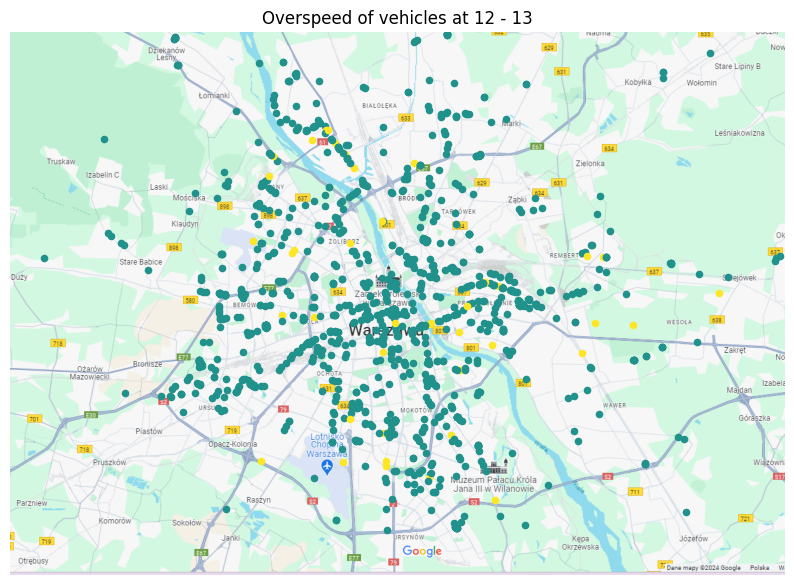

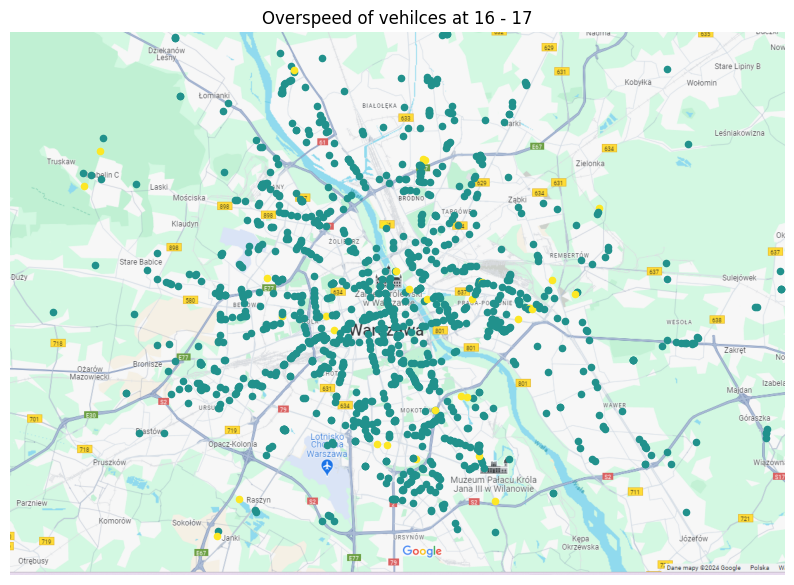

In [5]:
""" 
Here we are plotting on map two kinds of measurements:
1. buses which have speed over 50 km / h
2. the rest
(we are not considering buses over 90 km / h)
"""

from Helpers.dataframe_support import give_positions_from_a_few_minutes

positions_early = give_positions_from_a_few_minutes(positions_dfs[0], how_many_minutes = 4)
positions_late = give_positions_from_a_few_minutes(positions_dfs[1], how_many_minutes = 4)

speed_data_early = give_data_with_allowed_and_not_allowed_speed(positions_early)
speed_data_late = give_data_with_allowed_and_not_allowed_speed(positions_late)

plot_points_on_map(speed_data_early, title = "Overspeed of vehicles at 12 - 13")
plot_points_on_map(speed_data_late, title = "Overspeed of vehilces at 16 - 17")

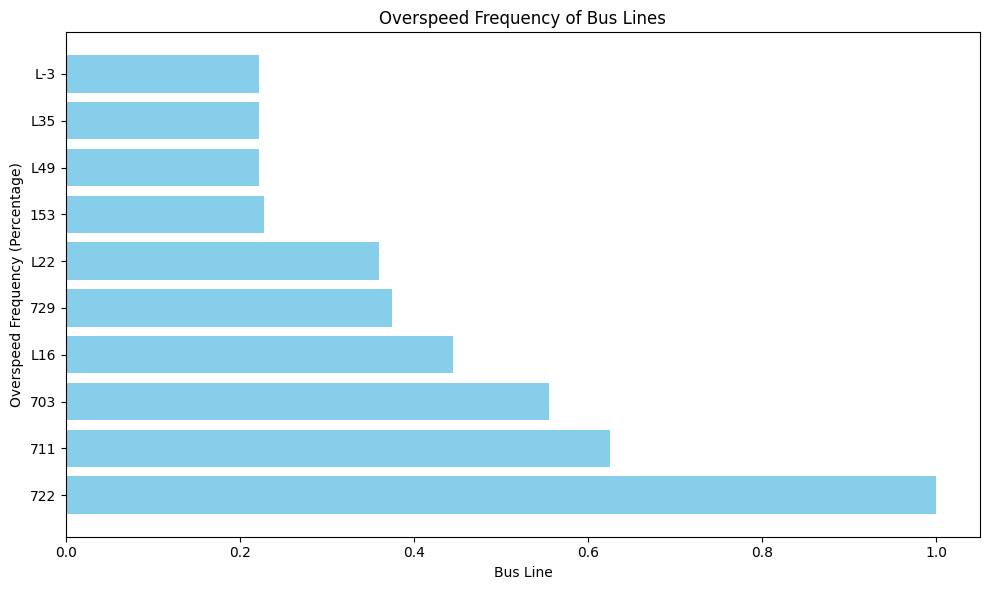

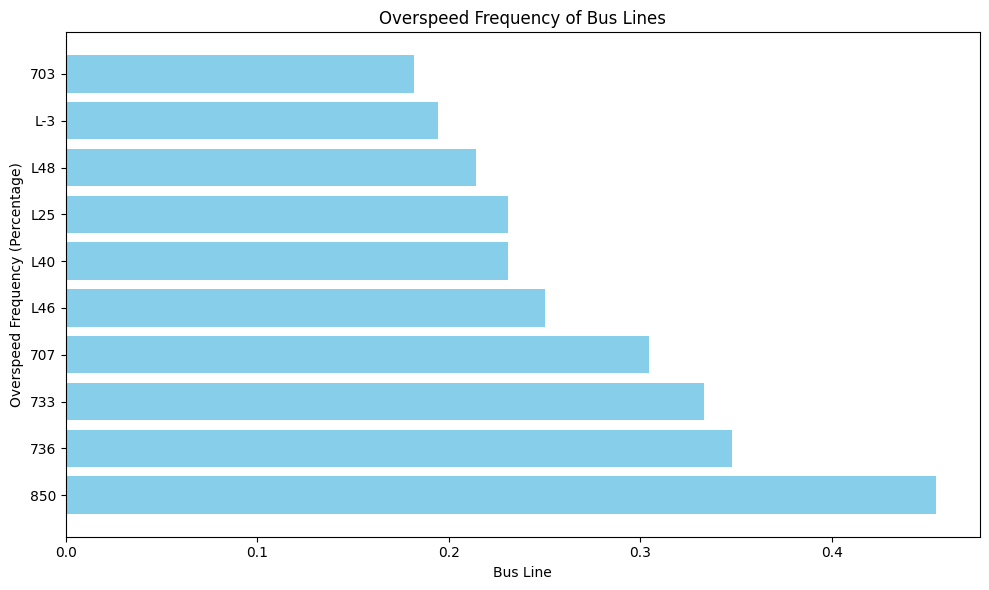

In [6]:
""" 
Now we can check for 10 fastest lines and plot them
(just for fun)
"""
from Speed.speed import give_lines_with_most_frequent_overspeed_df
from Helpers.visualization import visualize_overspeed_percentage_within_line

HOW_MANY_FAST_LINES  = 10
fast_lines_early = give_lines_with_most_frequent_overspeed_df(positions_early, 
                                                            how_many = HOW_MANY_FAST_LINES)
fast_lines_late = give_lines_with_most_frequent_overspeed_df(positions_late, 
                                                            how_many = HOW_MANY_FAST_LINES)
    
visualize_overspeed_percentage_within_line(fast_lines_early)
visualize_overspeed_percentage_within_line(fast_lines_late)
    


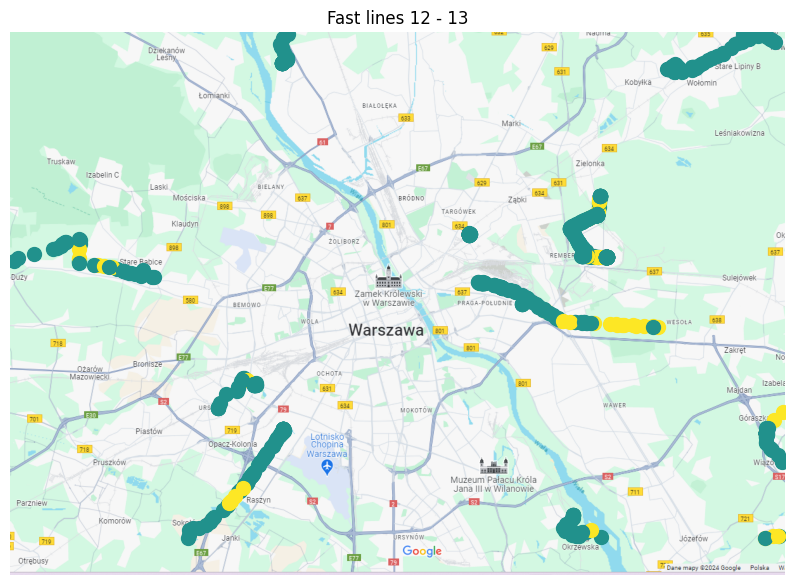

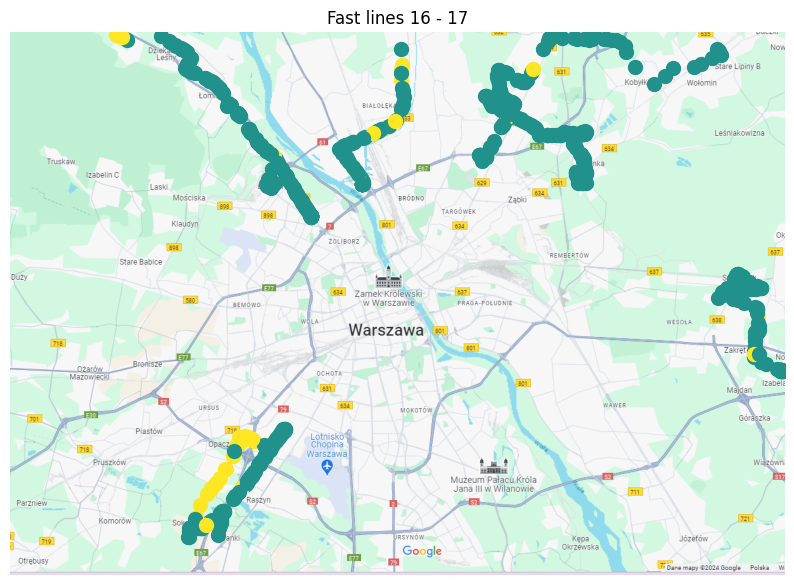

In [7]:
from Data_reading.modifying_dfs import Aliases as als

def plot_fast_lines(fast_lines, positions_df, title):
    pos_of_fast_lines = positions_df[positions_df[als.LINE.value].isin(fast_lines)] 

    speed_data = give_data_with_allowed_and_not_allowed_speed(pos_of_fast_lines)
    plot_points_on_map(speed_data, dot_size = 100, title = title)


plot_fast_lines(fast_lines_early[als.LINE.value], positions_dfs[0], "Fast lines 12 - 13")
plot_fast_lines(fast_lines_late[als.LINE.value], positions_dfs[1], "Fast lines 16 - 17")

[[[0 0]
  [0 0]
  [0 0]
  ...
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  ...
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  ...
  [0 0]
  [0 0]
  [0 0]]

 ...

 [[0 0]
  [0 0]
  [0 0]
  ...
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  ...
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  ...
  [0 0]
  [0 0]
  [0 0]]]
[[[0 0]
  [0 0]
  [0 0]
  ...
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  ...
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  ...
  [0 0]
  [0 0]
  [0 0]]

 ...

 [[0 0]
  [0 0]
  [0 0]
  ...
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  ...
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  ...
  [0 0]
  [0 0]
  [0 0]]]


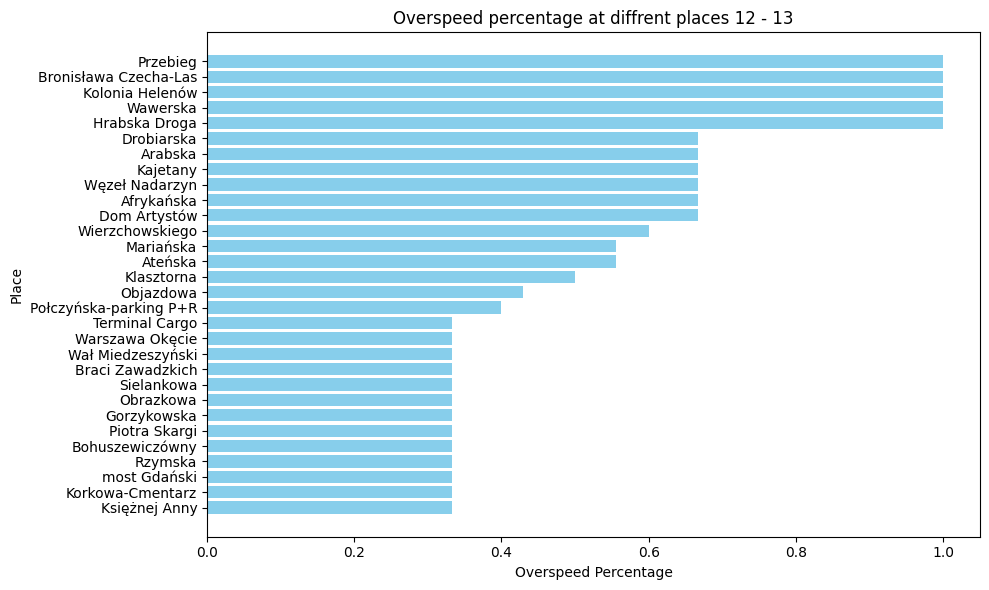

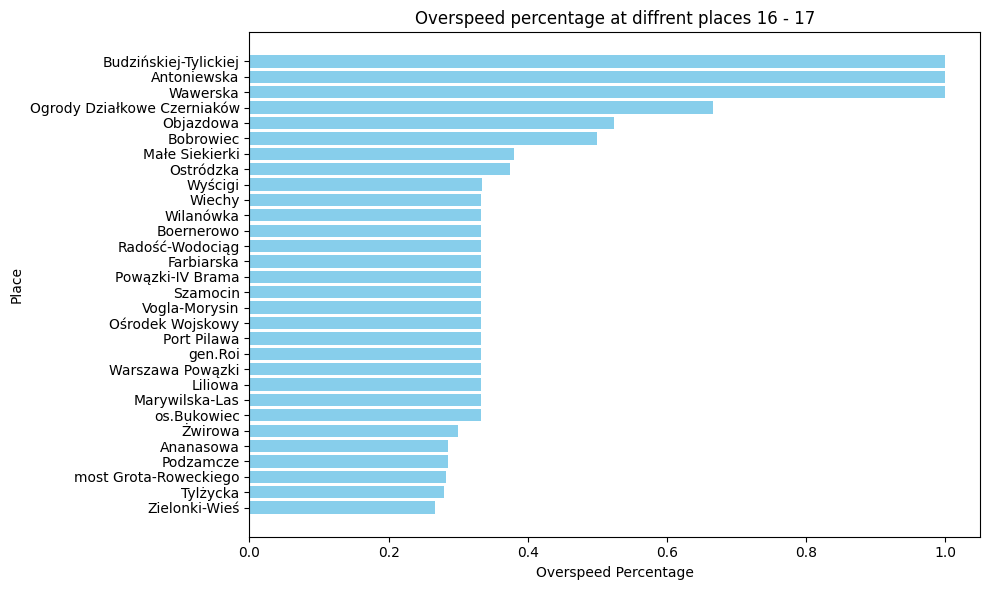

In [8]:
""" 
Now we are going to plot places around which 
overspeed was very frequent
"""

from Speed.speed import give_dataframe_of_coords_with_line_and_speed
from Speed.fast_localizations import give_fastest_places
from Helpers.visualization import visualize_overspeed_in_places

HOW_MANY = 30

speed_with_coords_early = give_dataframe_of_coords_with_line_and_speed(positions_early)
speed_with_coords_late = give_dataframe_of_coords_with_line_and_speed(positions_late)

fastest_places_early = give_fastest_places(bus_stops_dfs[0], speed_with_coords_early, how_many = HOW_MANY)
fastest_places_late = give_fastest_places(bus_stops_dfs[1], speed_with_coords_late, how_many = HOW_MANY)

visualize_overspeed_in_places(fastest_places_early, 
                              title = "Overspeed percentage at diffrent places 12 - 13")
visualize_overspeed_in_places(fastest_places_late,
                              title = "Overspeed percentage at diffrent places 16 - 17")


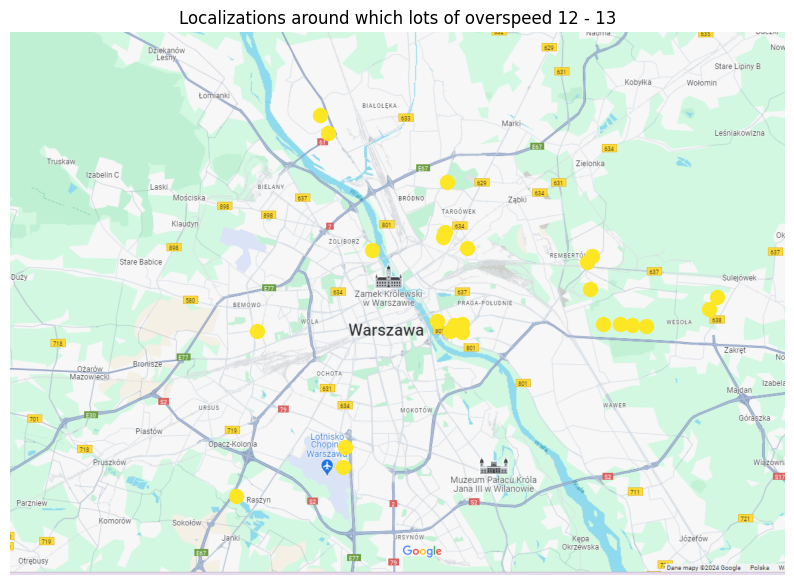

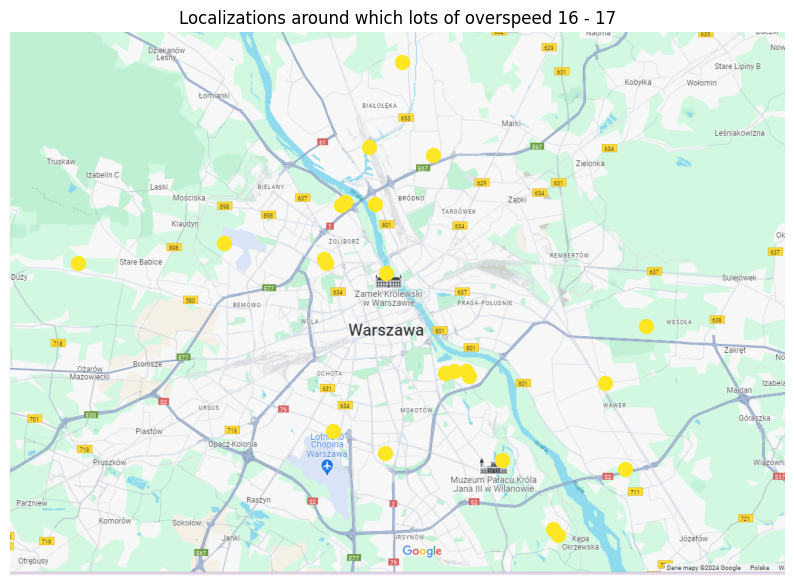

In [9]:
from Speed.fast_localizations import give_places_coords_to_plot_on_map

fastest_places_coords_data_early = give_places_coords_to_plot_on_map(fastest_places_early,
                                                                     bus_stops_dfs[0])
fastest_places_coords_data_late = give_places_coords_to_plot_on_map(fastest_places_late,
                                                                     bus_stops_dfs[1])

plot_points_on_map(fastest_places_coords_data_early, dot_size=100, 
                   title = "Localizations around which lots of overspeed 12 - 13")
plot_points_on_map(fastest_places_coords_data_late, dot_size = 100,
                   title = "Localizations around which lots of overspeed 16 - 17")

In [10]:
from Helpers.dataframe_support import give_dfs_contain_part_of_column
from Punctuality.arrivals import give_df_with_arrivals

dfs = positions_dfs
lines_time_tables_we_have = time_tables_dfs[0][als.LINE.value].unique().tolist()
selected_positions = give_dfs_contain_part_of_column(positions_dfs, als.LINE.value, 
                                                     selected_values = lines_time_tables_we_have)
selected_vehicles_early = selected_positions[0]
selected_vehicles_late = selected_positions[1]

arrivals_df_early_by_line = give_df_with_arrivals(selected_vehicles_early, 
                                                  lines_stops_dfs[0], bus_stops_dfs[0])
arrivals_df_late_by_line = give_df_with_arrivals(selected_vehicles_late, 
                                                 lines_stops_dfs[1], bus_stops_dfs[1])

selected_positions = give_dfs_contain_part_of_column(positions_dfs, als.VEHICLE_NUMBER.value)
selected_vehicles_early_by_veh = selected_positions[0]
selected_vehicles_late_by_veh = selected_positions[1]

arrivals_df_early_by_veh = give_df_with_arrivals(selected_vehicles_early_by_veh, 
                                                 lines_stops_dfs[0], bus_stops_dfs[0])
arrivals_df_late_by_veh = give_df_with_arrivals(selected_vehicles_late_by_veh, 
                                                lines_stops_dfs[1], bus_stops_dfs[1])


['L51', '217', '212', '213', '210', '211', '264']


In [11]:
from Punctuality.punctuality import give_df_with_avg_delay_on_bus_stop 
from Punctuality.punctuality import give_df_with_expected_waiting_time_on_bus_stop 

expected_waiting_early = give_df_with_expected_waiting_time_on_bus_stop(arrivals_df_early_by_veh, 
                                                                        positions_dfs[0])
expected_waiting_late = give_df_with_expected_waiting_time_on_bus_stop(arrivals_df_late_by_veh, 
                                                                        positions_dfs[1])

delays_early = give_df_with_avg_delay_on_bus_stop(arrivals_df_early_by_line, time_tables_dfs[0])
delays_late = give_df_with_avg_delay_on_bus_stop(arrivals_df_late_by_line, time_tables_dfs[1])

from Punctuality.prep_to_visualize import most_delayed_bus_stops_data
from Punctuality.prep_to_visualize import shortest_expected_waiting_bus_stops
from Punctuality.prep_to_visualize import bus_stops_to_plot_on_map_where_better_random_time


[Timestamp('2024-02-19 12:11:21')]
[Timestamp('2024-02-20 12:09:00'), Timestamp('2024-02-20 12:29:00'), Timestamp('2024-02-20 12:49:00')]
xdddddd
xd
xd
2
2
xd
xd
18
18
xd
xd
38
3
7.666666666666667 1
1006012
[Timestamp('2024-02-19 12:26:12'), Timestamp('2024-02-19 12:06:14'), Timestamp('2024-02-19 12:47:28')]
[Timestamp('2024-02-20 12:06:00'), Timestamp('2024-02-20 12:26:00'), Timestamp('2024-02-20 12:46:00')]
xdddddd
xd
xd
20
xd
0
xd
41
0
xd
xd
0
xd
20
xd
21
0
xd
xd
20
xd
40
xd
1
1
0.3333333333333333 1
1006013
[Timestamp('2024-02-19 12:24:16'), Timestamp('2024-02-19 12:04:23'), Timestamp('2024-02-19 12:28:36')]
[Timestamp('2024-02-20 12:05:00'), Timestamp('2024-02-20 12:25:00'), Timestamp('2024-02-20 12:45:00'), Timestamp('2024-02-20 12:05:00'), Timestamp('2024-02-20 12:25:00'), Timestamp('2024-02-20 12:45:00'), Timestamp('2024-02-20 12:05:00'), Timestamp('2024-02-20 12:25:00'), Timestamp('2024-02-20 12:45:00'), Timestamp('2024-02-20 12:05:00'), Timestamp('2024-02-20 12:25:00'), Timest

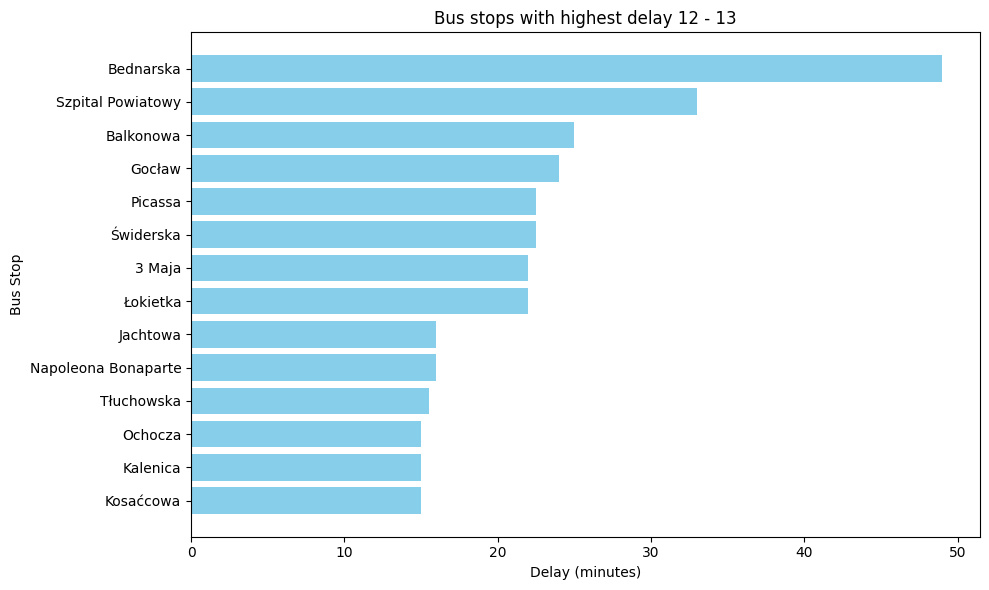

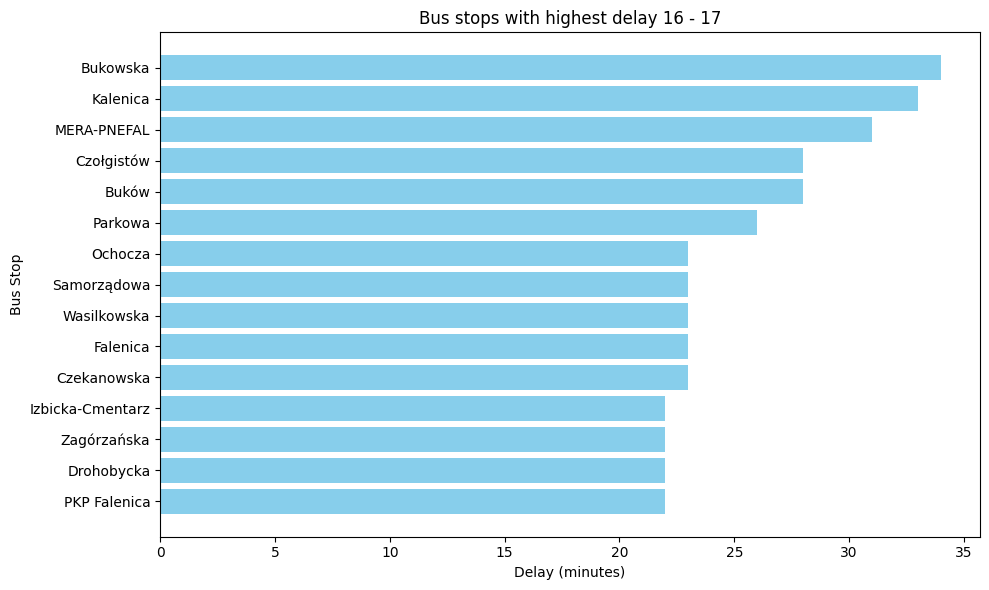

In [12]:
from Punctuality.prep_to_visualize import most_delayed_bus_stops_data

from Helpers.visualization import plot_most_delayed_bus_stops

HOW_MANY = 15

def plot_delays(delays_df, title, how_many = 20):
    df = most_delayed_bus_stops_data(delays_df, bus_stops_dfs[0], how_many)
    plot_most_delayed_bus_stops(df, title)
    
plot_delays(delays_early, "Bus stops with highest delay 12 - 13", HOW_MANY)
plot_delays(delays_late, "Bus stops with highest delay 16 - 17", HOW_MANY)


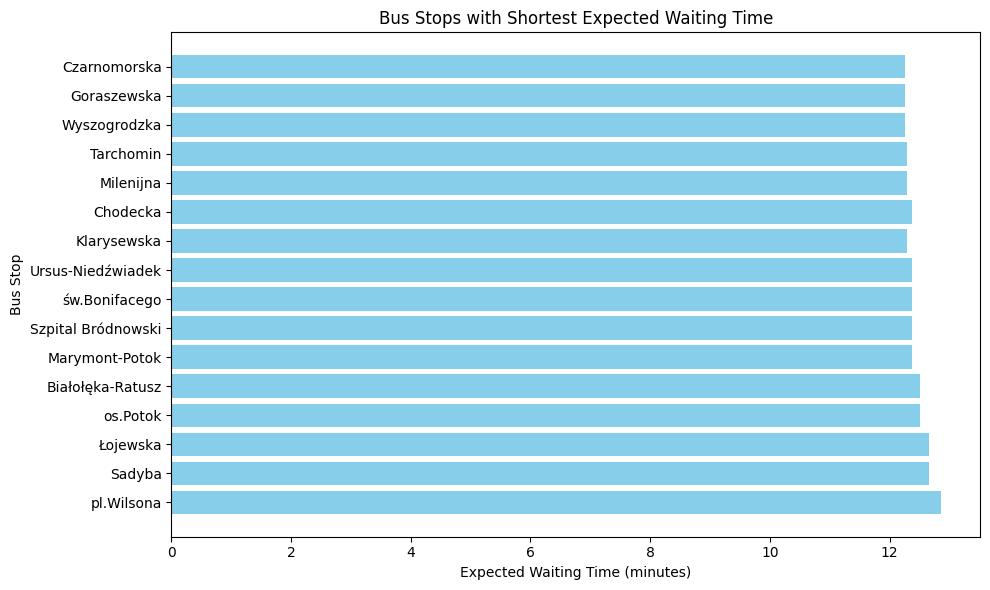

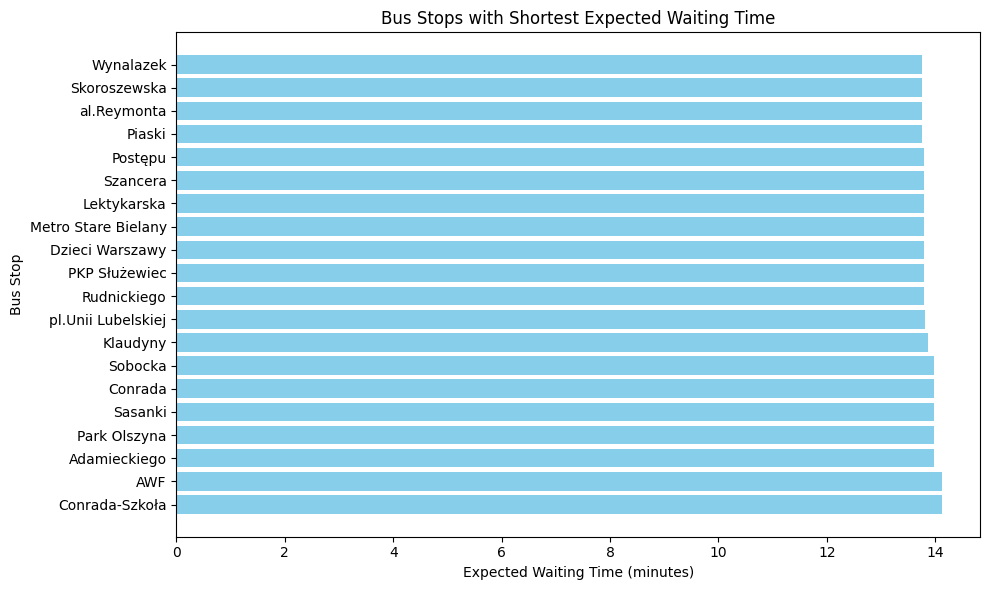

In [13]:
from Punctuality.prep_to_visualize import shortest_expected_waiting_bus_stops

from Helpers.visualization import plot_shortest_expected_waiting_bus_stops

def plot_expected_waiting_time(expected_time_df, how_many = 20):
    df = shortest_expected_waiting_bus_stops(expected_time_df, bus_stops_dfs[0], how_many)
    plot_shortest_expected_waiting_bus_stops(df)
    
plot_expected_waiting_time(expected_waiting_early)
plot_expected_waiting_time(expected_waiting_late)

[[52.299583, 20.993503, 1], [52.292008, 21.041442, 1], [52.28895, 21.040962, 1], [52.288873, 21.040929, 1], [52.318856, 20.966187, 1], [52.169008, 21.068064, 1], [52.167187, 21.084809, 1], [52.164075, 21.069863, 1], [52.1599, 21.07286, 1]]


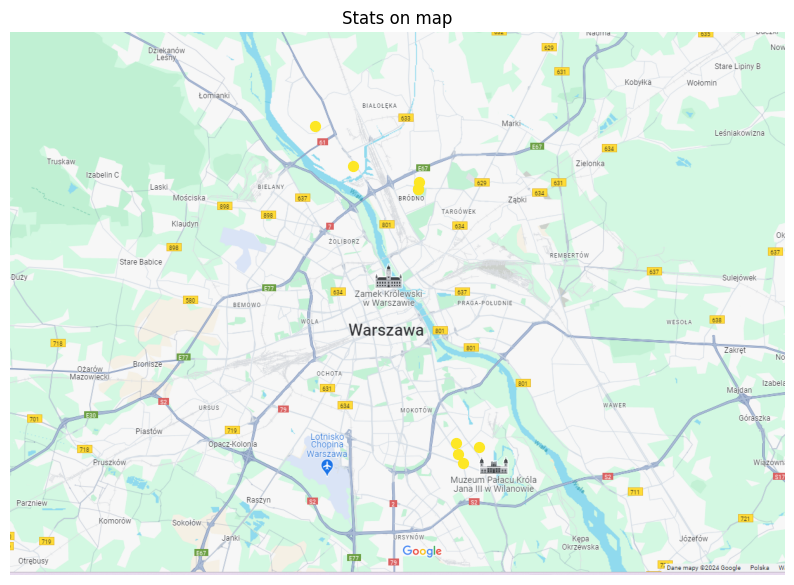

[[52.318856, 20.966187, 1], [52.33322, 20.941682, 1], [52.28201, 20.925361, 1], [52.283726, 20.927142, 1], [52.285194, 20.929197, 1], [52.291443, 20.93082, 1]]


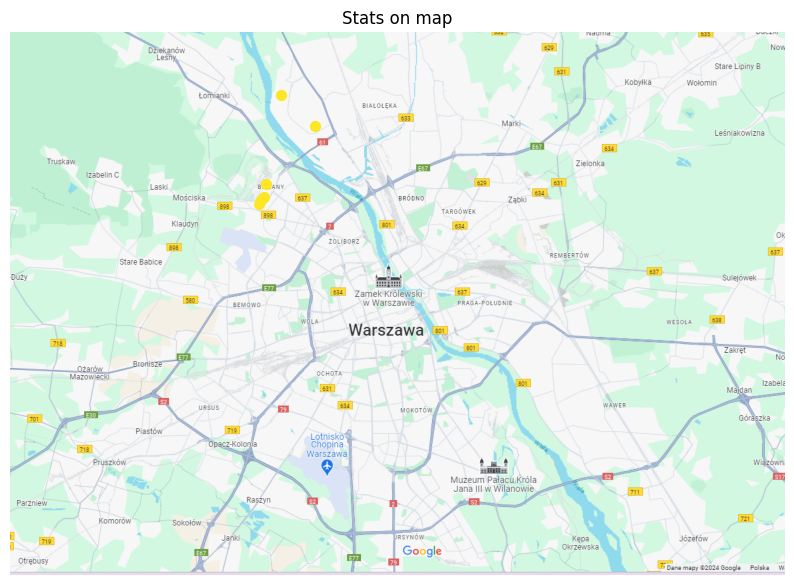

In [14]:
from Punctuality.prep_to_visualize import bus_stops_to_plot_on_map_where_better_random_time

PLANNING_DELAY = 20
DOT_SIZE = 50

def plot_bus_stops_where_better_random_time(delays_df, expected_waiting_df):
    data_to_plot = bus_stops_to_plot_on_map_where_better_random_time(delays_df,
                                                                     expected_waiting_df,
                                                                     bus_stops_dfs[0],
                                                                     PLANNING_DELAY)
    plot_points_on_map(data_to_plot, dot_size = DOT_SIZE)
    
plot_bus_stops_where_better_random_time(delays_early, expected_waiting_early)
plot_bus_stops_where_better_random_time(delays_late, expected_waiting_late)